### Prelude
Checking what's inside the dataset

In [6]:
frame <- read.csv("./data/Salary_Data.csv")
str(frame)

'data.frame':	6704 obs. of  6 variables:
 $ Age                : int  32 28 45 36 52 29 42 31 26 38 ...
 $ Gender             : chr  "Male" "Female" "Male" "Female" ...
 $ Education.Level    : chr  "Bachelor's" "Master's" "PhD" "Bachelor's" ...
 $ Job.Title          : chr  "Software Engineer" "Data Analyst" "Senior Manager" "Sales Associate" ...
 $ Years.of.Experience: num  5 3 15 7 20 2 12 4 1 10 ...
 $ Salary             : int  90000 65000 150000 60000 200000 55000 120000 80000 45000 110000 ...


### Comparing by education
I'm primarily interested in comparing by salary

In [7]:
education.levels <- unique(frame$Education.Level)
education.levels

[1] "Bachelor's"        "Master's"          "PhD"              
[4] ""                  "Bachelor's Degree" "Master's Degree"  
[7] "High School"       "phD"

In [8]:
rename.level <- function(old, new) {
  replaced <- gsub(old, new, frame$Education.Level)
  frame$Education.Level <<- replaced
}
rename.level("phD", "PhD")
rename.level("Bachelor's Degree", "Bachelor's")
rename.level("Master's Degree", "Master's")
rename.level("^$", "High School")

In [9]:
education.levels <- unique(frame$Education.Level)
education.levels

[1] "Bachelor's"  "Master's"    "PhD"         "High School"

In [10]:
average <- function(values) {
  cleaned.values <- values[complete.cases(values)]
  if (length(cleaned.values) <= 0) {
    return(0)
  }
  output <- mean(cleaned.values)
  return(output)
}

In [11]:
salaries.by.education <- sapply(education.levels, function(level) {
  data.by.level <- frame[frame$Education.Level == level, ]
  salaries.by.level <- data.by.level$Salary
  output <- average(salaries.by.level)
})
names(salaries.by.education) <- NULL

salaries.by.education <- data.frame(
  Level = education.levels,
  Mean.Salary = round(salaries.by.education)
)

salaries.by.education

Level,Mean.Salary
<chr>,<dbl>
Bachelor's,95083
Master's,130112
PhD,165651
High School,36848


In [12]:
library(gridExtra)
library(ggplot2)

saved.table <- tableGrob(salaries.by.education)
ggsave("./output/salary-by-education.png", saved.table, width = 3, height = 2)

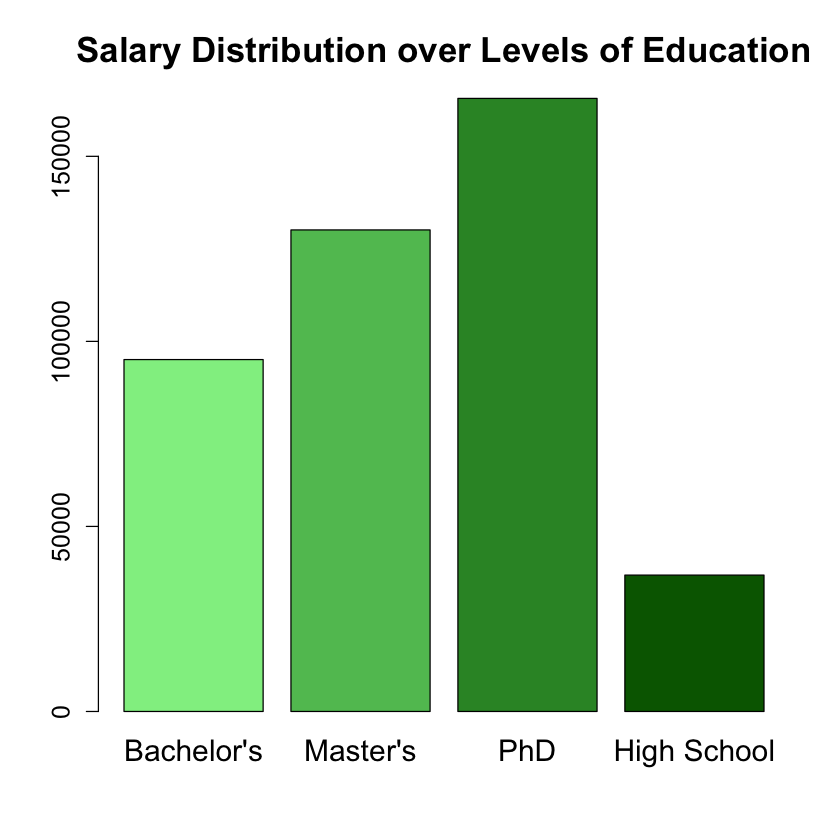

In [13]:
par(bg = "white")
my.palette <- colorRampPalette(c("lightgreen", "darkgreen"))
my.colors <- my.palette(nrow(salaries.by.education))
barplot(
  salaries.by.education$Mean.Salary,
  names.arg = salaries.by.education$Level,
  col = my.colors,
  cex.axis = 1.25,
  cex.names = 1.5,
  main = "Salary Distribution over Levels of Education",
  cex.main = 1.75
)

In [14]:
compute.field.complexity <- function(field) {
  education.info <- field$Education.Level
  points <- sapply(education.info, function(info) {
    if (info == "High School") return(1)
    if (info == "Bachelor's")  return(3)
    if (info == "Master's")    return(4)
    if (info == "PhD")         return(8)
    return(0)
  })
  output <- average(points)
  return(output)
}

In [15]:
fields <- unique(frame$Job.Title)
field.complexity <- sapply(fields, function(field.name) {
  field <- frame[frame$Job.Title == field.name, ]
  complexity <- compute.field.complexity(field)
  return(complexity)
})
names(field.complexity) <- NULL

In [16]:
field.complexity <- data.frame(
  Field <- fields,
  Complexity <- field.complexity
)
field.complexity[1:5, ]

,Field....fields,Complexity....field.complexity
,<chr>,<dbl>
1,Software Engineer,3.077220
2,Data Analyst,3.209366
3,Senior Manager,8.000000
4,Sales Associate,1.142857
5,Director,4.000000


In [17]:
top.complex <- field.complexity[order(field.complexity$Complexity, decreasing = TRUE), ]
top.complex <- top.complex[1:10, ]
top.complex

,Field....fields,Complexity....field.complexity
,<chr>,<dbl>
3,Senior Manager,8
10,Senior Scientist,8
18,Senior Engineer,8
29,Senior Consultant,8
65,Research Director,8
73,Chief Technology Officer,8
78,Principal Scientist,8
82,Research Scientist,8
90,Chief Data Officer,8


In [18]:
library(options)

options(repr.plot.width = 8, repr.plot.height = 6)

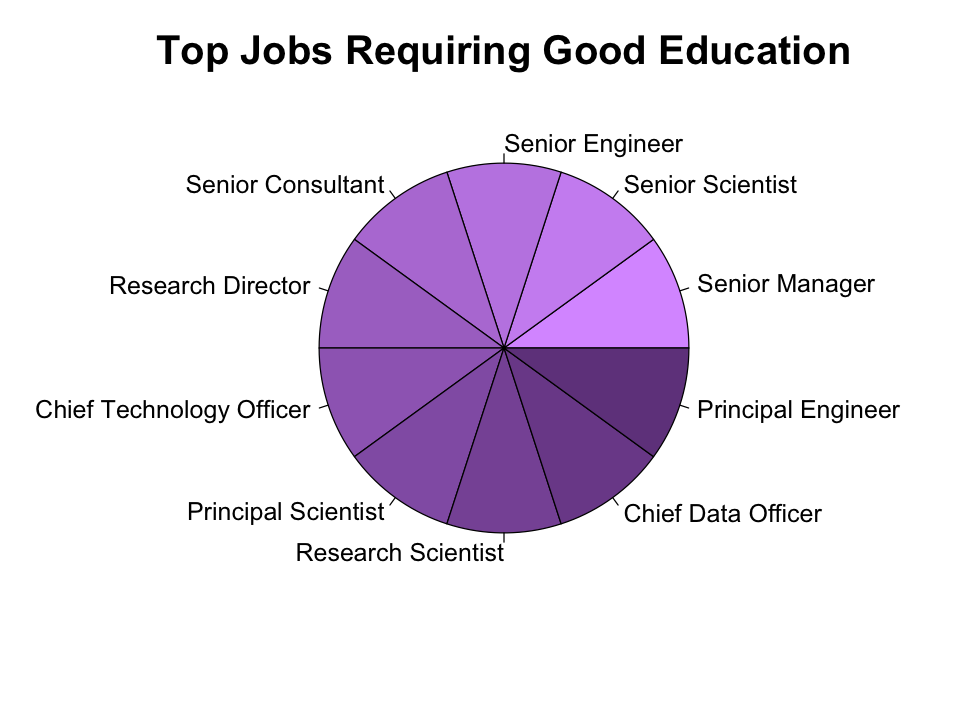

In [19]:
par(bg = "white")
my.palette <- colorRampPalette(c("#da9dff", "#71448c"))
my.colors <- my.palette(nrow(top.complex))
pie(
  top.complex$Complexity, 
  labels = top.complex$Field,
  cex = 1.25,
  col = my.colors,
  main = "Top Jobs Requiring Good Education",
  cex.main = 2
)

In [20]:
top.easy <- field.complexity[order(field.complexity$Complexity), ]
top.easy <- top.easy[2:11, ]
top.easy

,Field....fields,Complexity....field.complexity
,<chr>,<dbl>
181,Developer,1.000000
185,Junior Sales Associate,1.000000
187,Juniour HR Generalist,1.000000
188,Juniour HR Coordinator,1.000000
190,Receptionist,1.000000
194,Delivery Driver,1.000000
4,Sales Associate,1.142857
61,Customer Service Representative,1.333333
39,Sales Executive,1.631579


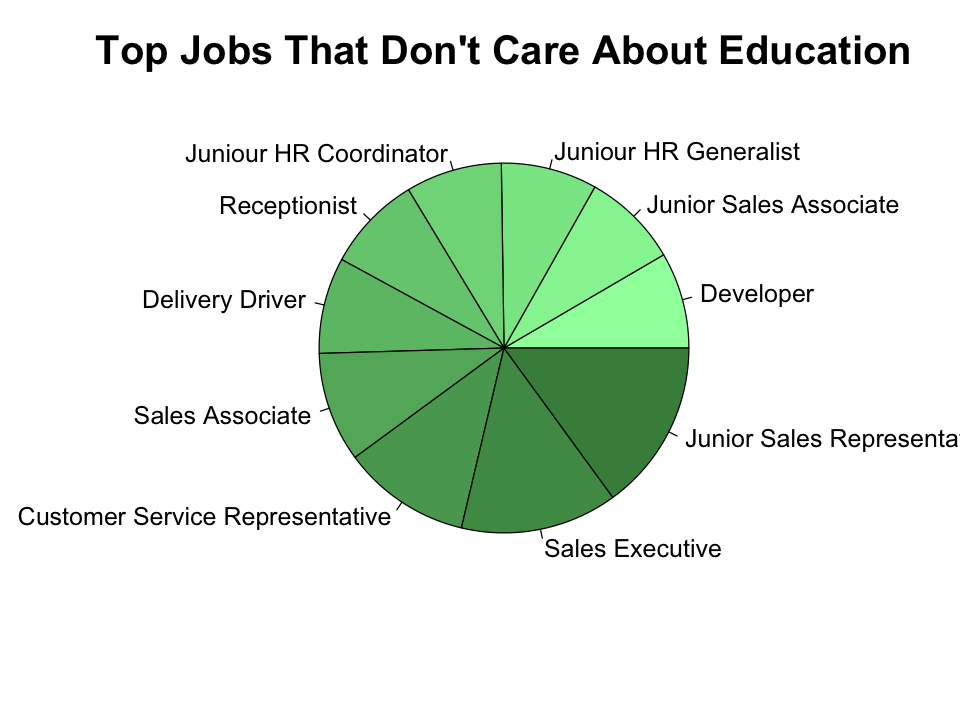

In [21]:
par(bg = "white")
my.palette <- colorRampPalette(c("#9dffaa", "#448c49"))
my.colors <- my.palette(nrow(top.easy))
pie(
  top.easy$Complexity, 
  labels = top.easy$Field,
  cex = 1.25,
  col = my.colors,
  main = "Top Jobs That Don't Care About Education",
  cex.main = 2
)

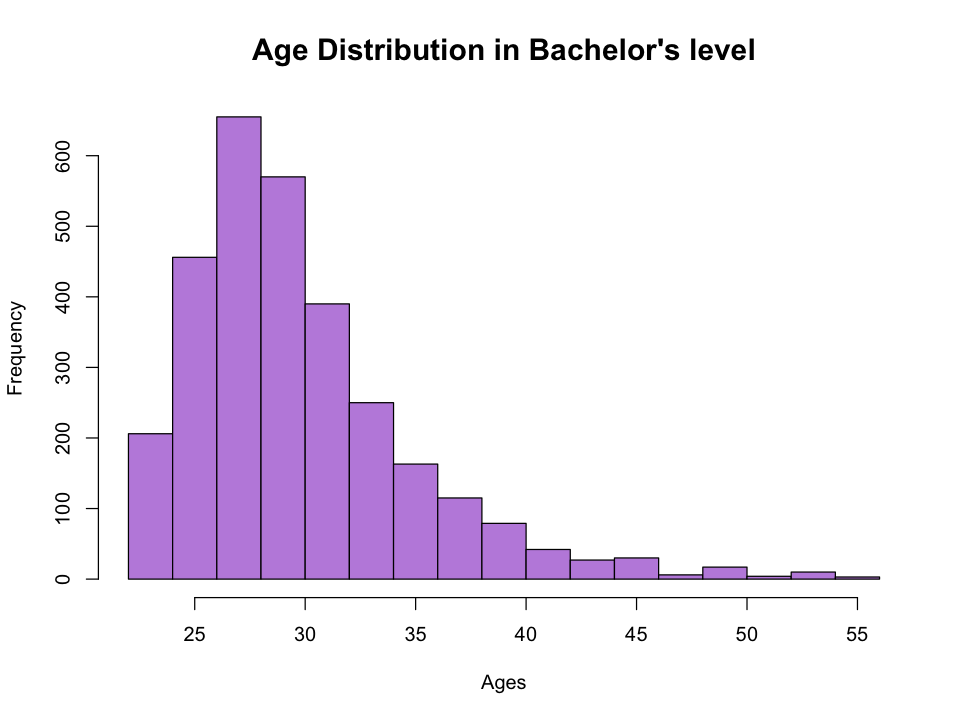

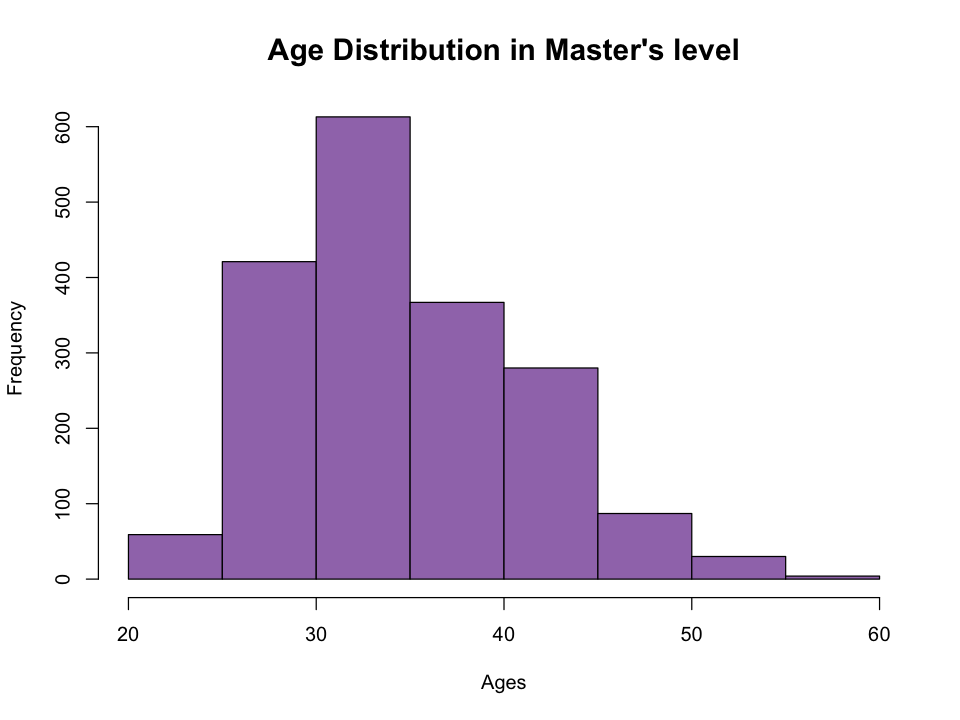

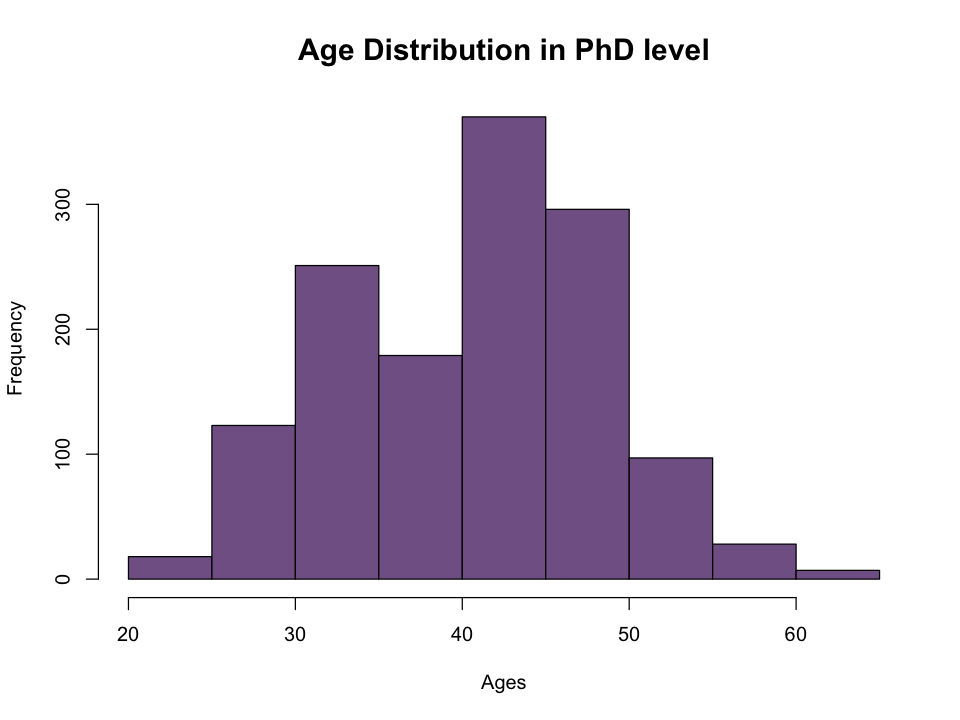

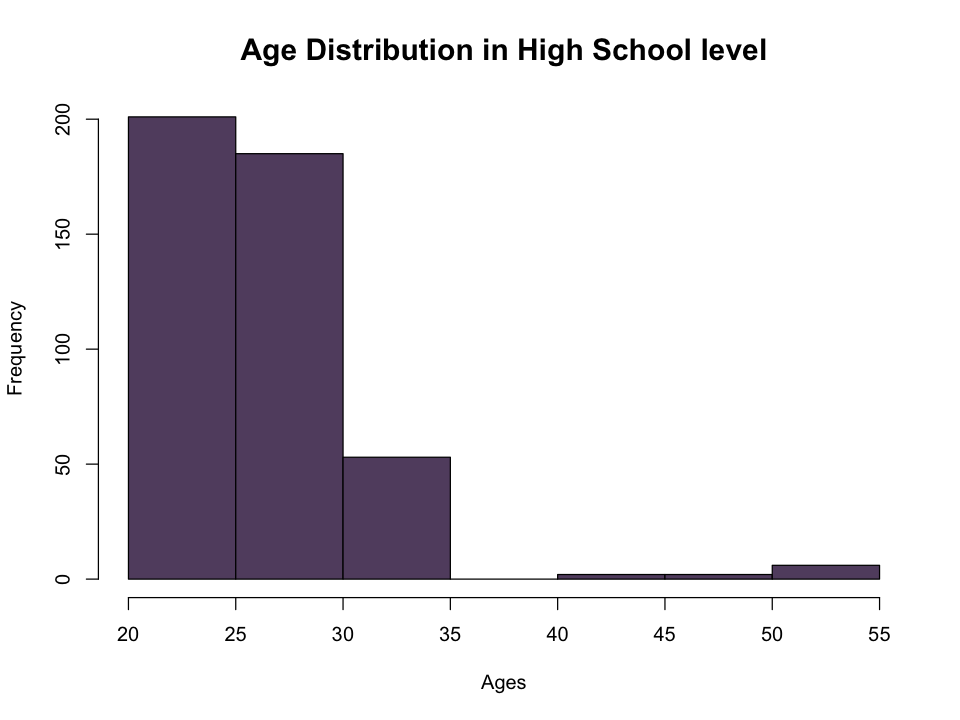

In [29]:
my.palette <- colorRampPalette(c("#c08edf", "#624e6f"))
my.colors <- my.palette(length(education.levels))
color.index <- 1

for (level in education.levels) {
  Ages <- frame[frame$Education.Level == level, ]$Age
  par(bg = "white")
  hist(
    Ages,
    main = paste("Age Distribution in", level, "level"), cex.main = 1.5, 
    col = my.colors[color.index]
  )
  color.index <- color.index + 1
}

In [30]:
average.ages <- sapply(education.levels, function(level) {
  ages <- frame[frame$Education.Level == level, ]$Age
  avg <- average(ages)
  return(avg)
})
names(average.ages) <- NULL

average.ages <- data.frame(
  Level = education.levels,
  Average.Age = average.ages
)

average.ages

Level,Average.Age
<chr>,<dbl>
Bachelor's,30.26067
Master's,35.16926
PhD,41.15486
High School,26.85523


In [32]:
library(options)

options(repr.plot.width = 6, repr.plot.height = 6)

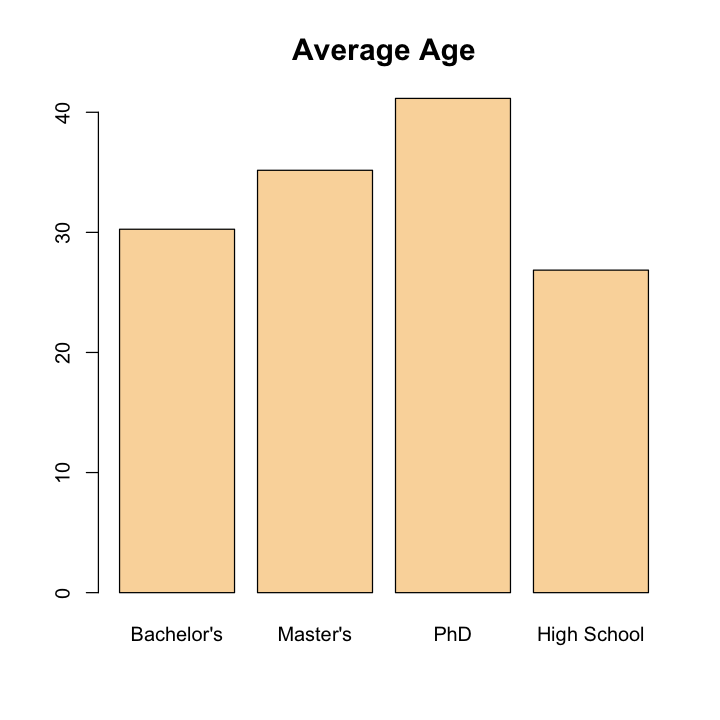

In [49]:
par(bg = "white")

values <- average.ages$Average.Age
labels <- average.ages$Level

barplot(
  values, names.arg = labels, col = "#fad8a9",
  main = "Average Age", cex.main = 1.5
)